In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mea_analysis_lvm as mea
import re

In [ ]:
vdf = pd.read_csv("NT002/MEA002_postS_100mV_V.tdms",skiprows=22, sep="\t")
smudf = pd.read_csv("NT002/MEA002_postS_100mV_SMU.tdms",skiprows=21, sep="\t")
basepath = "NT002/MEA002_postS_100mV_SMU.tdms"

vdf = vdf.drop(vdf.index[46000:])
smudf = smudf.drop(smudf.index[230:])

In [ ]:
vcols = []
for header in list(vdf):
    header = header.replace("Voltage_", "v")
    header = header.replace("Untitled", "current")
    header = header.replace("X_Value", "time")
    vcols.append(header)
vdf.columns = vcols
vdf["trel"] = vdf.time - vdf.time.iloc[0]
vdf.trel = pd.to_numeric(vdf.trel)
vdf = vdf.drop(['Comment'], axis=1)

smucols = []
for header in list(smudf):
    header = header.replace("Untitled", "current")
    header = header.replace("X_Value", "time")
    smucols.append(header)
smudf.columns = smucols
smudf["trel"] = smudf.time - smudf.time.iloc[0]
smudf.trel = pd.to_numeric(smudf.trel)
smudf = smudf.drop(['Comment'], axis=1)

V = False
if not (re.search("(\d+)V", basepath)):
     V = int(re.search("(\d+)mV", basepath).group(1))
elif not (re.search("(\d+)mV", basepath)):
        V = int(re.search("(\d+)V", basepath).group(1))
else:
    print("ERROR:couldnt detect conduction")
    print(basepath)
if V:
    smudf["voltage"] = V
    g0 = 7.75e-5  # quantum conductance
    smudf["conductance"] = smudf.current / smudf.voltage / g0

In [7]:
print(vdf.info())
print(smudf.info())
print(vdf.head())
print(smudf.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46000 entries, 0 to 45999
Data columns (total 18 columns):
time    46000 non-null float64
v0      46000 non-null float64
v1      46000 non-null float64
v2      46000 non-null float64
v3      46000 non-null float64
v4      46000 non-null float64
v5      46000 non-null float64
v6      46000 non-null float64
v7      46000 non-null float64
v8      46000 non-null float64
v9      46000 non-null float64
v10     46000 non-null float64
v11     46000 non-null float64
v12     46000 non-null float64
v13     46000 non-null float64
v14     46000 non-null float64
v15     46000 non-null float64
trel    46000 non-null float64
dtypes: float64(18)
memory usage: 6.7 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 5 columns):
time           230 non-null float64
current        230 non-null float64
trel           230 non-null float64
voltage        230 non-null int64
conductance    230 non-null float64
dtype

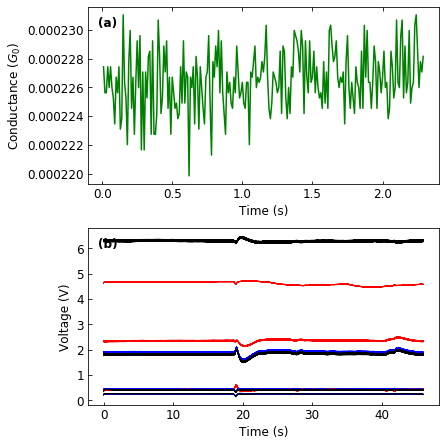

In [4]:
mea.plot_signal(vdf,smudf,show=True)

In [5]:
dg, iei =mea.analyze_events(smudf,gthresh=0.01)

IndexError: too many indices for array

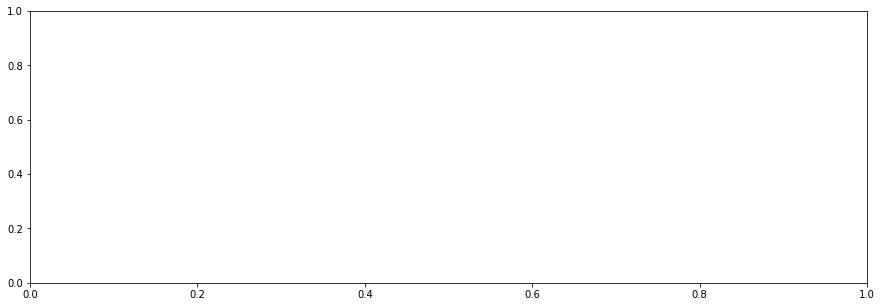

In [6]:
fig, ax = plt.subplots(nrows=1,figsize=(15,5))
ax.eventplot(dg[:,1],linewidth=1,color='k')
ax2=ax.twinx()
ax2.plot(smudf.trel,smudf.conductance,'r')

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
mea.plot_loglog(dg[:,0],axes[0])
mea.plot_loglog(iei,axes[1])
axes[0].set_title("loglog conductance switch size histogram")
axes[1].set_title("loglog interevent interval length histogram")

In [ ]:
resd=vdf.iloc[:,3:-1].values[43400:43600]
mea.plot_principal_components(resd, displaynan = [], show = True, ends = True)
plt.savefig('plots/MEA001_postS_5V_SMU.png')

In [ ]:
print(vdf.info())

In [ ]:
print(vdf.head())